In [6]:

import warnings
warnings.filterwarnings('ignore')

In [7]:

import pandas as pd
import numpy as np



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(10,6)


In [8]:
data=pd.read_csv('final_chess_munged_db.csv')

In [9]:
data['winner'] = data['winner'].map({'white': 1, 'black': 0})

In [10]:
data= data.drop(columns=['player_as_white_fav_opening_eco','id' ])

In [11]:

df = data.copy()

In [12]:

df.head()


,winner,base_time,add_time,total_time,game_class,opening_class,opening_eco_mod,rating_dif,same_elo_band_flag,same_elo_step_flag,...,black_checks_before_five,black_checks_before_ten,black_checks_before_fifteen,black_checks_limited_count,black_loss_before_five,black_loss_before_ten,black_loss_before_fifteen,player_as_white_fav_opening_class,player_white_total_games_count,player_black_total_games_count
0,1,5,10,15,1,2,220,-4,1,1,...,0,0,0,0,0,2,7,C,1,3
1,1,20,0,20,2,3,302,-15,1,1,...,0,0,0,0,0,0,2,D,2,2
2,1,30,3,35,2,2,241,54,1,1,...,0,0,0,0,0,1,3,C,2,2
3,1,10,0,10,1,3,300,97,1,1,...,0,1,1,2,1,2,4,D,1,8
4,0,15,0,15,2,2,250,47,0,1,...,1,1,1,1,1,2,2,C,1,8


In [13]:
data.shape

(14774, 37)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   winner                             14774 non-null  int64  
 1   base_time                          14774 non-null  int64  
 2   add_time                           14774 non-null  int64  
 3   total_time                         14774 non-null  int64  
 4   game_class                         14774 non-null  int64  
 5   opening_class                      14774 non-null  int64  
 6   opening_eco_mod                    14774 non-null  int64  
 7   rating_dif                         14774 non-null  int64  
 8   same_elo_band_flag                 14774 non-null  int64  
 9   same_elo_step_flag                 14774 non-null  int64  
 10  white_elo_band                     14774 non-null  int64  
 11  white_castle_turn_limited          13199 non-null  flo

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
winner,14774.0,0.511439,0.499886,0.0,0.0,1.0,1.0,1.0
base_time,14774.0,13.143157,14.346667,0.0,10.0,10.0,15.0,180.0
add_time,14774.0,4.610870,11.182292,0.0,0.0,0.0,6.0,180.0
total_time,14774.0,18.295384,23.367539,7.0,10.0,11.0,20.0,591.0
game_class,14774.0,1.330987,0.522652,0.0,1.0,1.0,2.0,3.0
opening_class,14774.0,1.536957,1.046516,0.0,1.0,2.0,2.0,4.0
opening_eco_mod,14774.0,180.060106,108.977208,0.0,101.0,200.0,250.0,498.0
rating_dif,14774.0,1.986192,238.481389,-1605.0,-106.0,1.0,112.0,1499.0
same_elo_band_flag,14774.0,0.445512,0.497039,0.0,0.0,0.0,1.0,1.0
same_elo_step_flag,14774.0,0.700014,0.458267,0.0,0.0,1.0,1.0,1.0


In [16]:
data.describe(exclude='number').T

,count,unique,top,freq
player_as_white_fav_opening_class,14774,5,C,6328


rating_dif
Skew : -0.02


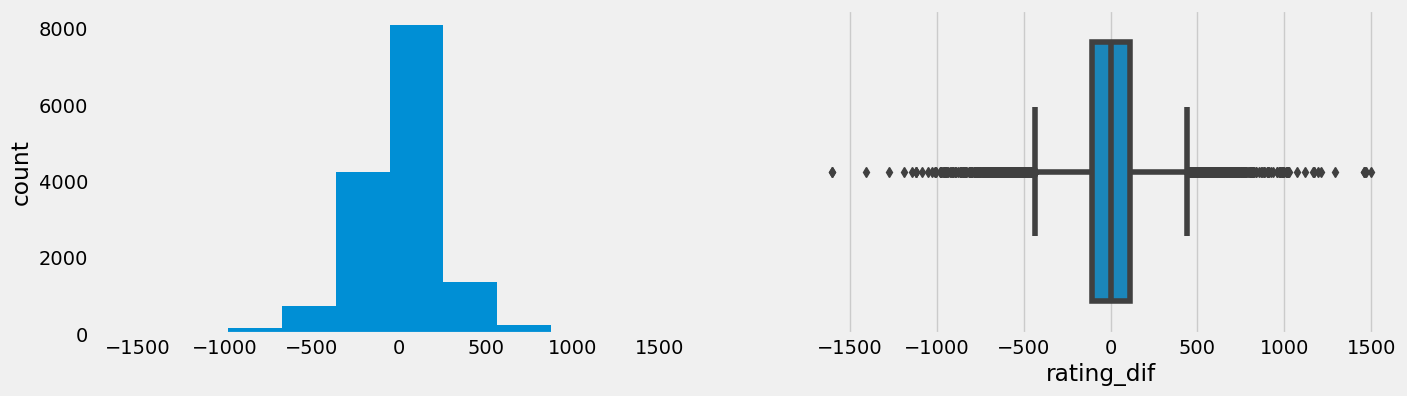

opening_eco_mod
Skew : 0.08


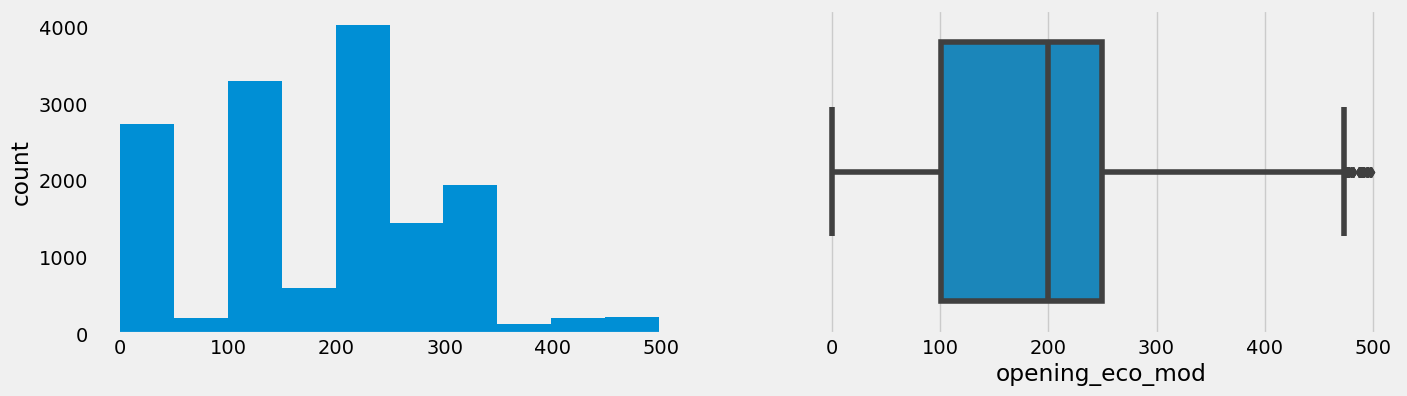

player_black_total_games_count
Skew : 0.76


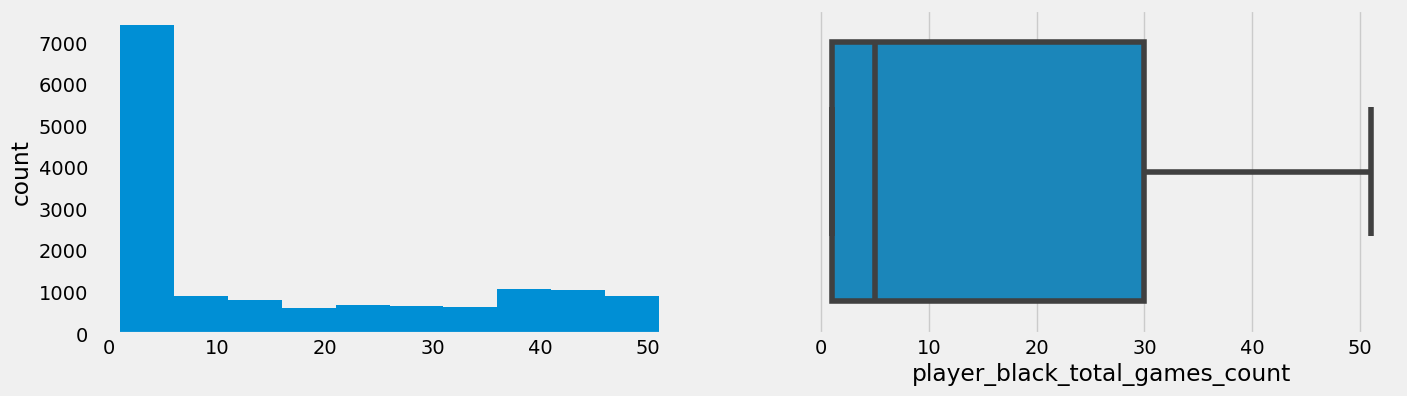

player_white_total_games_count
Skew : 0.76


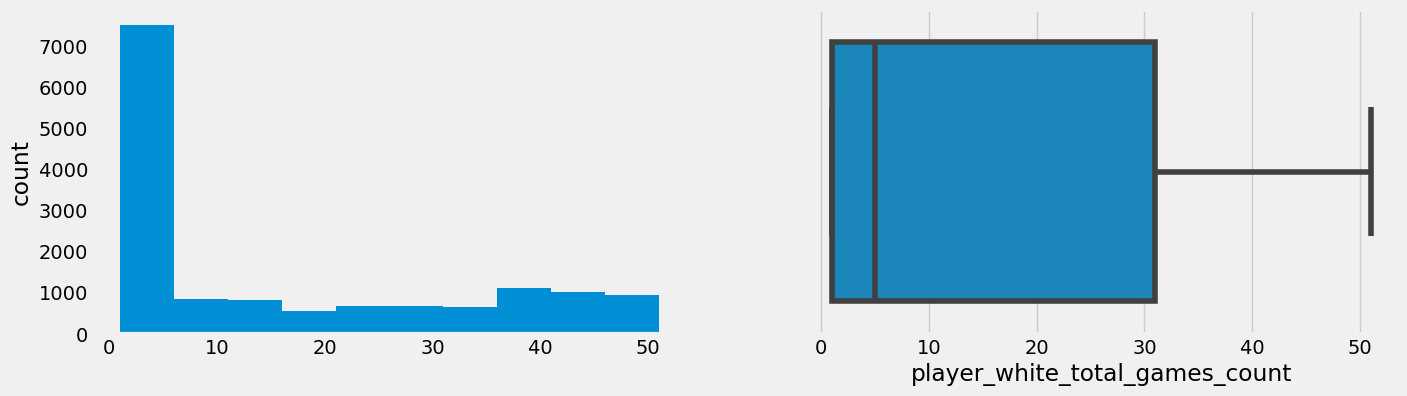

total_time
Skew : 10.4


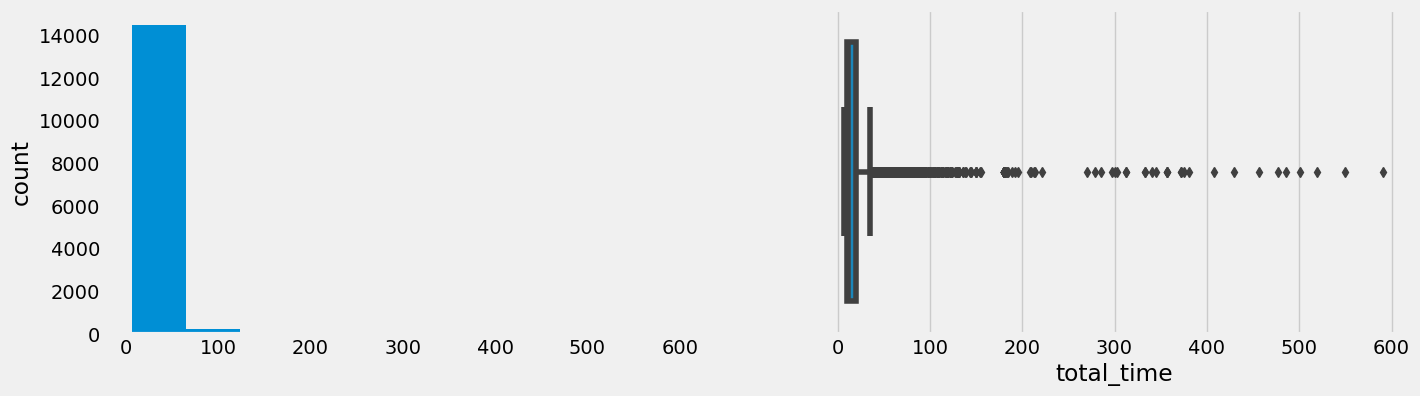

In [17]:
for col in ['rating_dif', 'opening_eco_mod', 'player_black_total_games_count', 'player_white_total_games_count','total_time']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

In [30]:

to_get_dummies_for = ['player_as_white_fav_opening_class']

df = pd.get_dummies(data = data, columns= to_get_dummies_for, drop_first= True) 

In [82]:
data.shape

(14774, 37)

In [83]:
print(data.columns)

Index(['winner', 'base_time', 'add_time', 'total_time', 'game_class',
       'opening_class', 'opening_eco_mod', 'rating_dif', 'same_elo_band_flag',
       'same_elo_step_flag', 'white_elo_band', 'white_castle_turn_limited',
       'white_castle_before_five', 'white_castle_before_ten',
       'white_castle_before_fifteen', 'white_checks_limited_count',
       'white_checks_before_five', 'white_checks_before_ten',
       'white_checks_before_fifteen', 'white_loss_before_five',
       'white_loss_before_ten', 'white_loss_before_fifteen', 'black_elo_band',
       'black_castle_turn_limited', 'black_castle_before_five',
       'black_castle_before_ten', 'black_castle_before_fifteen',
       'black_checks_before_five', 'black_checks_before_ten',
       'black_checks_before_fifteen', 'black_checks_limited_count',
       'black_loss_before_five', 'black_loss_before_ten',
       'black_loss_before_fifteen', 'player_as_white_fav_opening_class',
       'player_white_total_games_count', 'player_b

In [33]:
Y= df.winner
X= df.drop(['winner'],axis=1)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [86]:

from sklearn.metrics import classification_report
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['black', 'white'], yticklabels=['black', 'white'])
    plt.ylabel('Actual')
    plt.xlabel('Predicho')
    plt.show()

In [87]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test,y_score,models, model_name, palette ,sub_pop):
    position=range(len(models))
    fig,ax=plt.subplots(figsize=(9,7))
    
    for model, name, colc, pos in zip(models,model_name,palette,position):
        fpr, tpr, _=roc_curve(y_test,
                              y_score[:,1],
                              pos_label=None,
                              sample_weight=None,drop_intermediate=True)
        plt.plot(fpr,tpr,color=colc,label=name,linewidth=3)
        plt.text(0.65,0.1+0.05 ,"AUC({}):".format(name)+str(roc_auc_score(y_test,y_score[:,1]))[:6],fontsize=14)
    
    plt.plot([0, 1], [0, 1],color="red",linestyle="dashed",lw=2,alpha=0.8)
    plt.axis([0,1,0,1])
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC : - {0}".format(sub_pop))
    plt.legend()
    
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_score[:,1])

    plt.figure(figsize=(9,7))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='upper left')
    plt.title("THRESHOLD - PRECISION VS RECALL")
    plt.ylim([0,1])
    plt.show()

In [88]:
import lightgbm as lgb

lgbm_default= lgb.LGBMClassifier(objective='binary')
lgbm_default.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5289, number of negative: 5052
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 10341, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511459 -> initscore=0.045845
[LightGBM] [Info] Start training from score 0.045845


LGBMClassifier(objective='binary')

In [89]:

print('AUC Train: ',roc_auc_score(y_train,lgbm_default.predict(x_train)))
print('AUC Validación: ',roc_auc_score(y_test,lgbm_default.predict(x_test)))

AUC Train:  0.7920969618744411
AUC Validación:  0.6650732884727315


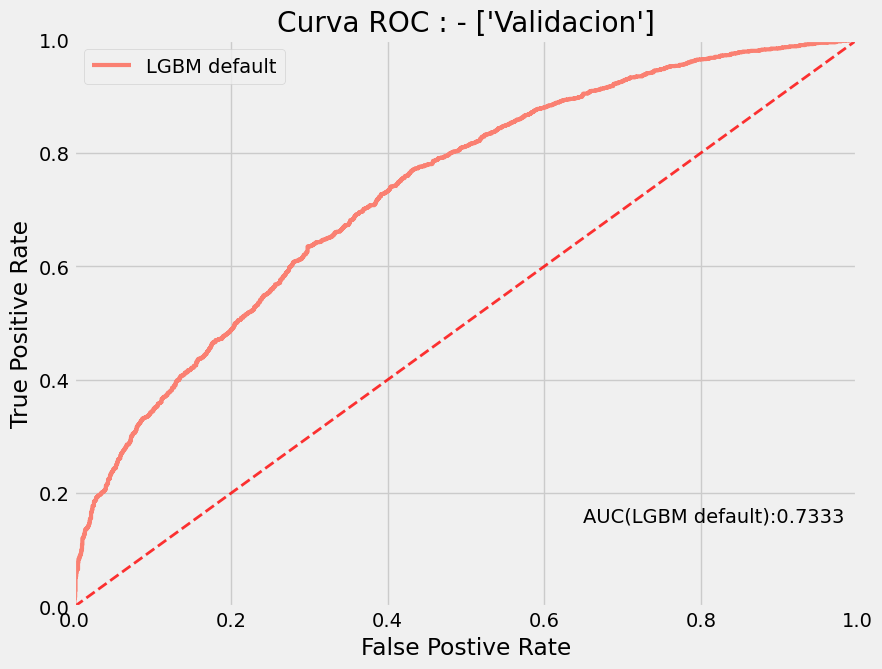

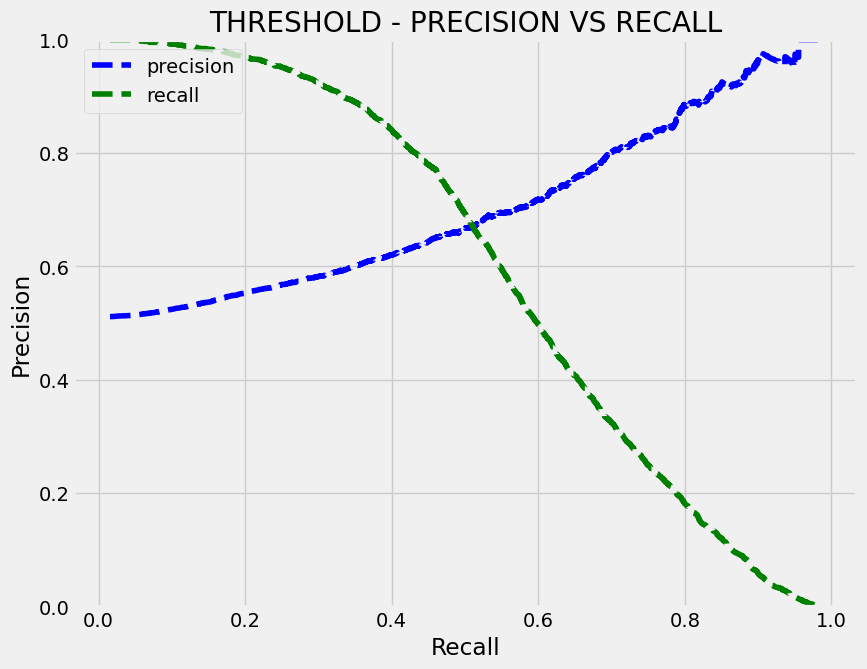

In [90]:

y_score = lgbm_default.predict_proba(x_test)

models=['predict_lgm']
models_name=['LGBM default']
palette=['salmon']
sub_pop=['Validacion']
plot_roc_curve(y_test ,y_score ,models , models_name, palette, sub_pop)

              precision    recall  f1-score   support

           0       0.79      0.31      0.44      2166
           1       0.58      0.92      0.71      2267

    accuracy                           0.62      4433
   macro avg       0.69      0.61      0.58      4433
weighted avg       0.68      0.62      0.58      4433



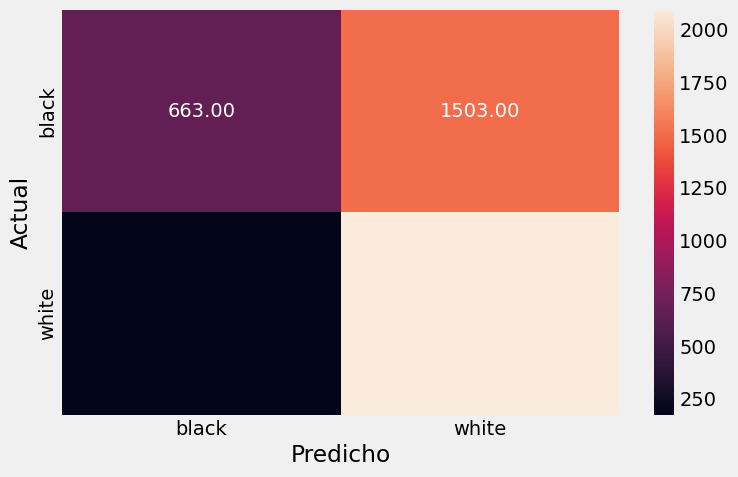

In [92]:
optimal_threshold1=.3
metrics_score(y_test, y_score[:,1]>optimal_threshold1)

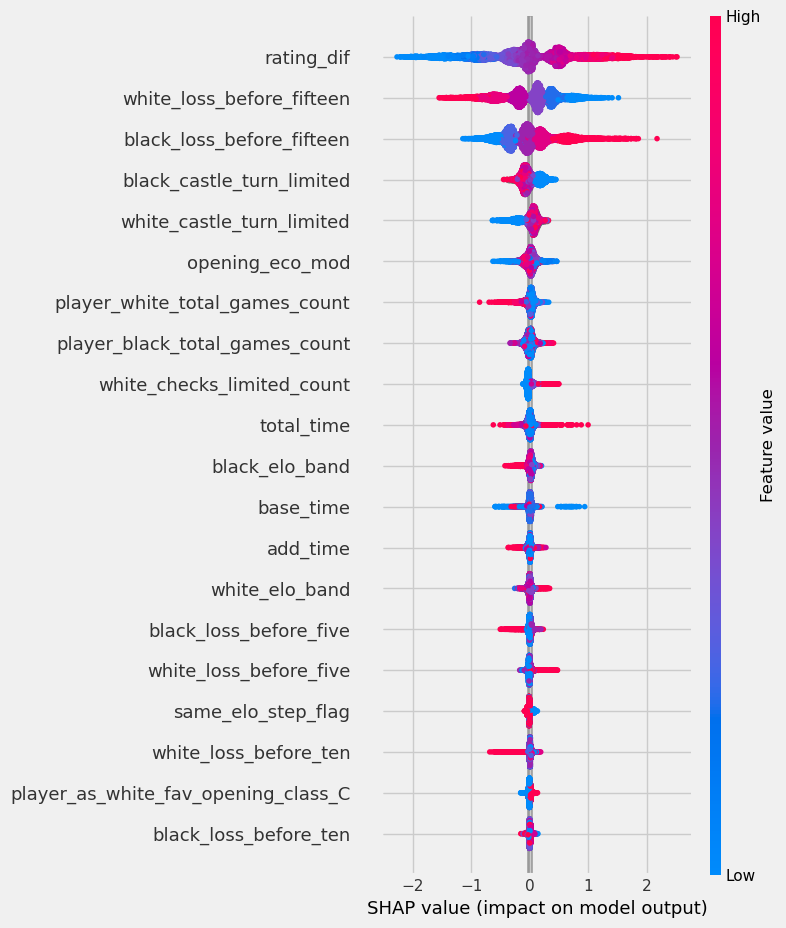

In [93]:
import shap

explainer = shap.TreeExplainer(lgbm_default)
shap_values = explainer.shap_values(x_train)

shap.summary_plot(shap_values, x_train)

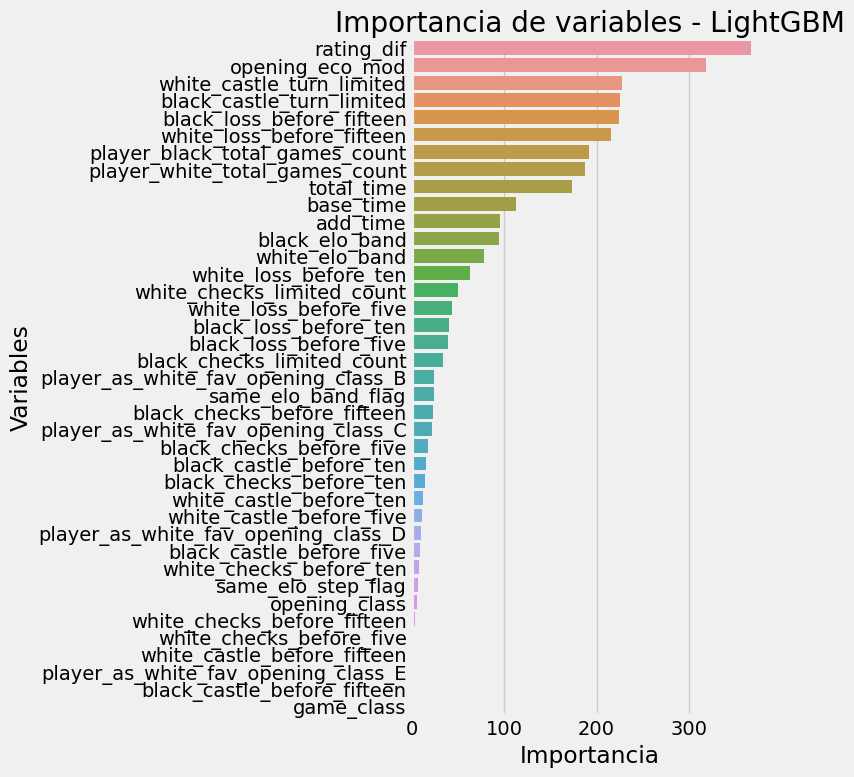

In [94]:
importances = lgbm_default.feature_importances_
columns = x_train.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title("Importancia de variables - LightGBM")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

In [95]:
lgbm_1 = lgb.LGBMClassifier(max_depth=10,num_leaves=15,random_state=42,objective='binary').fit(x_train,y_train)
lgbm_1

[LightGBM] [Info] Number of positive: 5289, number of negative: 5052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 10341, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511459 -> initscore=0.045845
[LightGBM] [Info] Start training from score 0.045845


LGBMClassifier(max_depth=10, num_leaves=15, objective='binary', random_state=42)

In [96]:
# auc train vs auc val
print('AUC Train: ',roc_auc_score(y_train,lgbm_1.predict(x_train)))
print('AUC Validación: ',roc_auc_score(y_test,lgbm_1.predict(x_test)))

AUC Train:  0.7292930044833785
AUC Validación:  0.6709722906155645


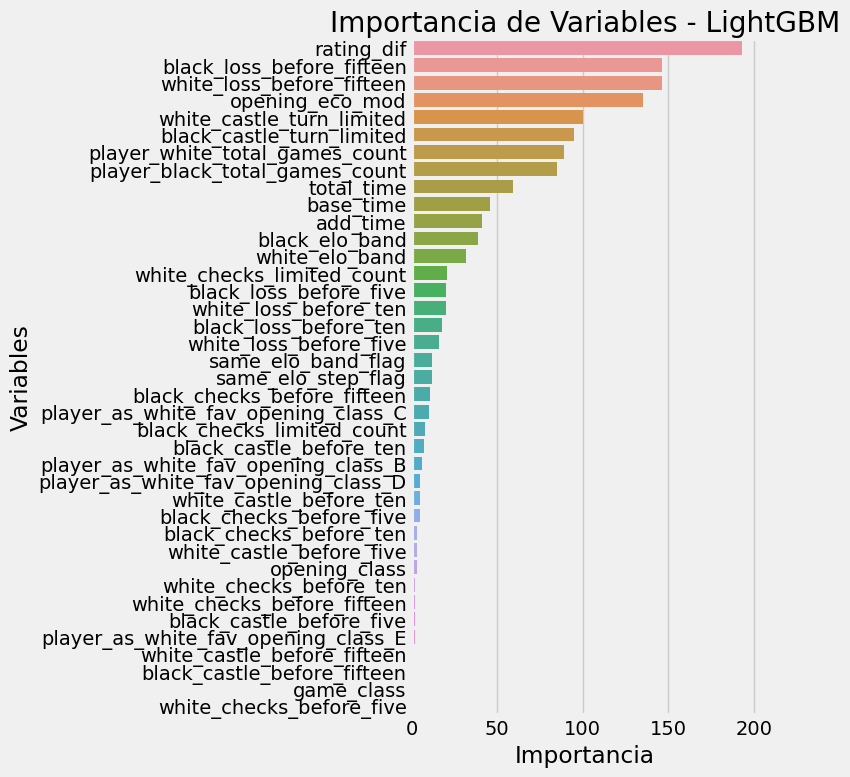

In [97]:
importances = lgbm_1.feature_importances_
columns = x_test.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title("Importancia de Variables - LightGBM")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

In [98]:
lgbm_2 = lgb.LGBMClassifier(max_depth=10,
                            num_leaves=15,
                            random_state=42,
                            bagging_fraction=0.9,
                           max_bin=2,
                           bjective='binary').fit(x_train,y_train)

print('AUC Train: ',roc_auc_score(y_train,lgbm_1.predict(x_train)))
print('AUC Validación: ',roc_auc_score(y_test,lgbm_1.predict(x_test)))

[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 5289, number of negative: 5052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 10341, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511459 -> initscore=0.045845
[LightGBM] [Info] Start training from score 0.045845
AUC Train:  0.7292930044833785
AUC Validación:  0.6709722906155645


In [99]:

lgbm__3 = lgb.LGBMClassifier(learning_rate=0.09,
                         max_depth=-5,
                         random_state=42,
                        colsample_bytree=0.8754369812451743, 
                         min_child_samples= 372, 
                         min_child_weight= 10.0,
                         num_leaves=44, 
                         reg_alpha=1, 
                         subsample=0.568664015245299,
                        objective='binary').fit(x_train,y_train)


print('AUC Train: ',roc_auc_score(y_train,lgbm_1.predict(x_train)))
print('AUC Validación: ',roc_auc_score(y_test,lgbm_1.predict(x_test)))

[LightGBM] [Info] Number of positive: 5289, number of negative: 5052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 10341, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511459 -> initscore=0.045845
[LightGBM] [Info] Start training from score 0.045845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation


fit_params = {
    "callbacks": [
        early_stopping(stopping_rounds=30),
        log_evaluation(2)
    ],
    "eval_set": [(x_test, y_test)]
}

param_test = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(100, 500),
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000],
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50, 100]
}

clf = lgb.LGBMClassifier(
    max_depth=-1,
    random_state=314,
    n_jobs=4,
    n_estimators=500
)

gs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True
)

gs.fit(x_train, y_train, **fit_params)

print('Best score reached: {} with params: {}'.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 3526, number of negative: 3368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 6894, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511459 -> initscore=0.045845
[LightGBM] [Info] Start training from score 0.045845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.674644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [101]:


lgbm_3 = lgb.LGBMClassifier(colsample_bytree=0.9501241488957805, 
                            min_child_samples=301, 
                            min_child_weight=0.01,
                            num_leaves=28,
                            reg_alpha=0,
                            reg_lambda=100,
                        objective='binary').fit(x_train,y_train)


print('AUC Train: ',roc_auc_score(y_train,lgbm_3.predict(x_train)))
print('AUC Validación: ',roc_auc_score(y_test,lgbm_3.predict(x_test)))


[LightGBM] [Info] Number of positive: 5289, number of negative: 5052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 10341, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511459 -> initscore=0.045845
[LightGBM] [Info] Start training from score 0.045845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

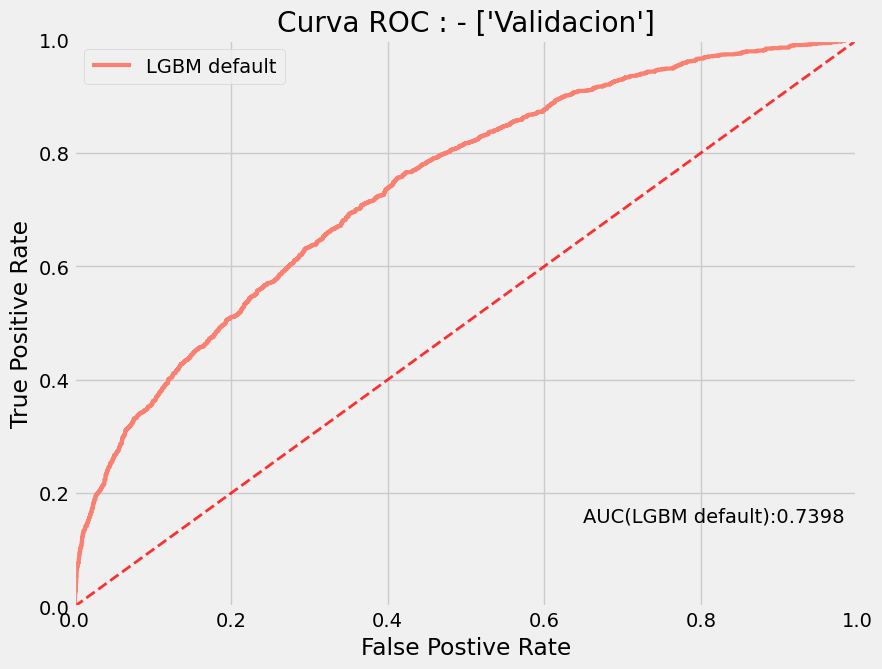

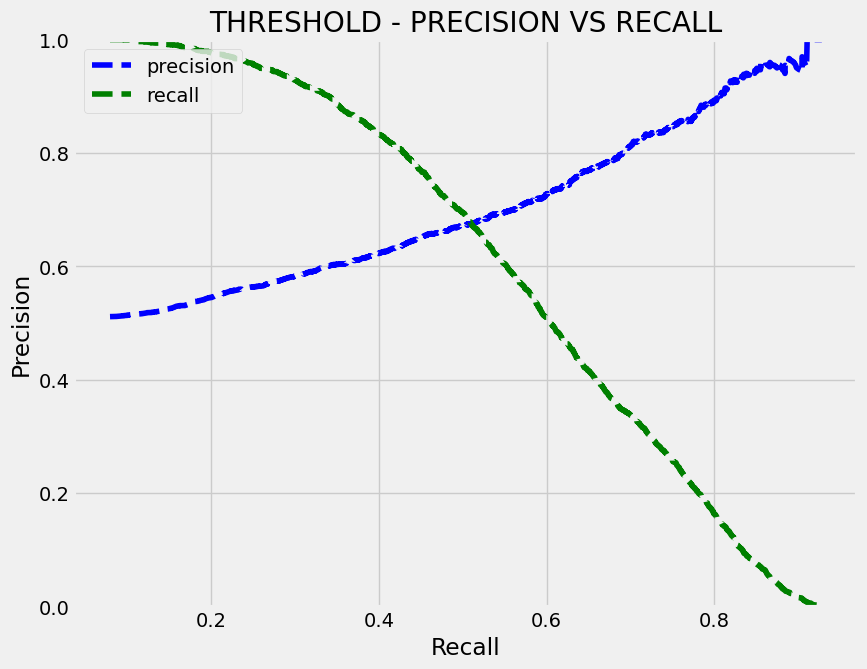

In [102]:

y_score = lgbm_3.predict_proba(x_test)

models=['predict_lgm']
models_name=['LGBM default']
palette=['salmon']
sub_pop=['Validacion']
plot_roc_curve(y_test ,y_score ,models , models_name, palette, sub_pop)

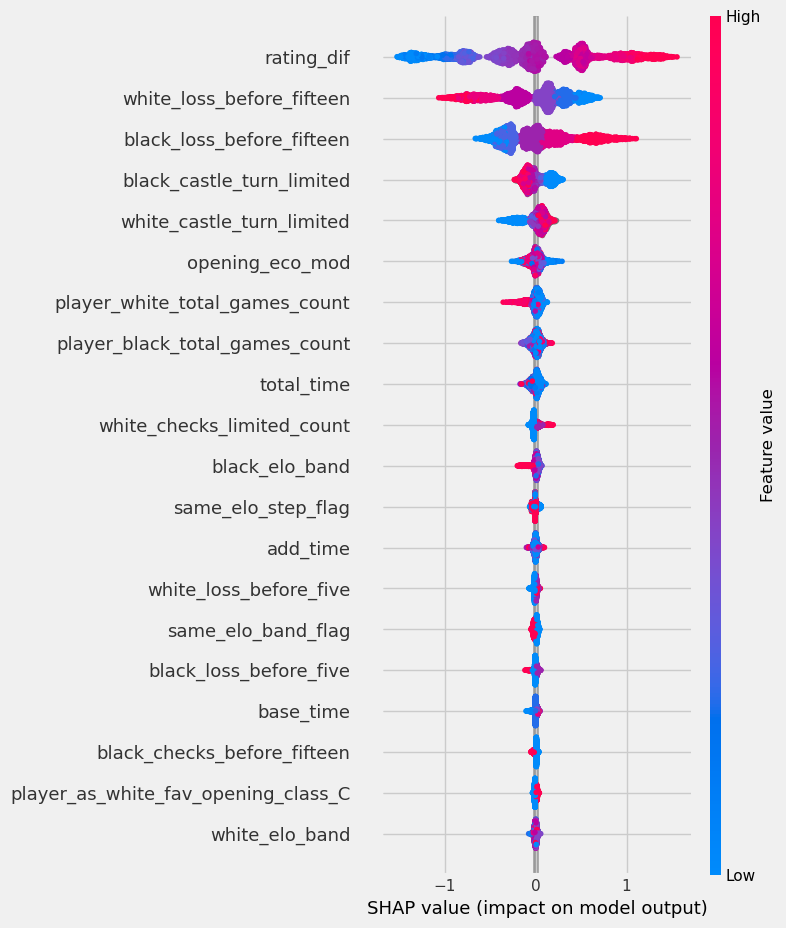

In [105]:
explainer = shap.TreeExplainer(lgbm_3)
shap_values = explainer.shap_values(x_test)


shap.summary_plot(shap_values, x_test)

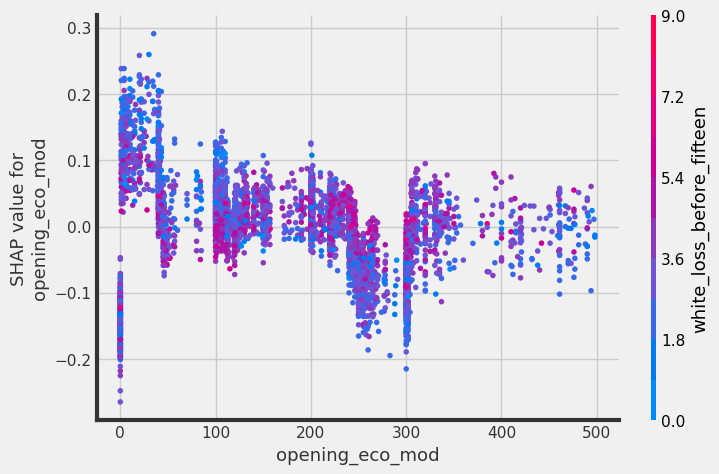

In [107]:
shap.dependence_plot("opening_eco_mod", shap_values, x_test)

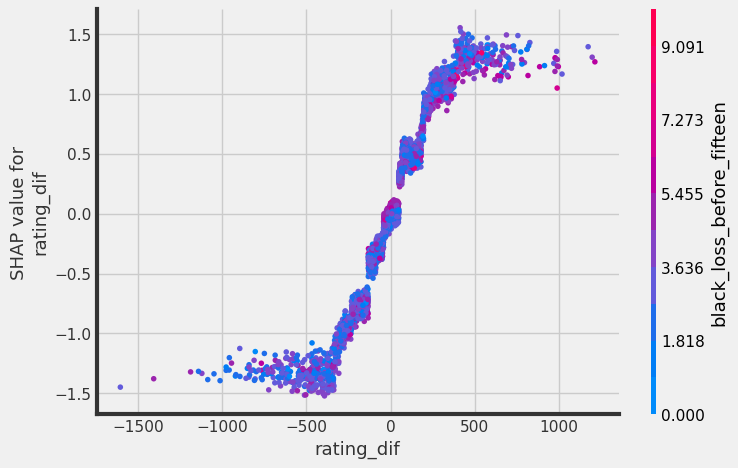

In [109]:
shap.dependence_plot("rating_dif", shap_values, x_test)

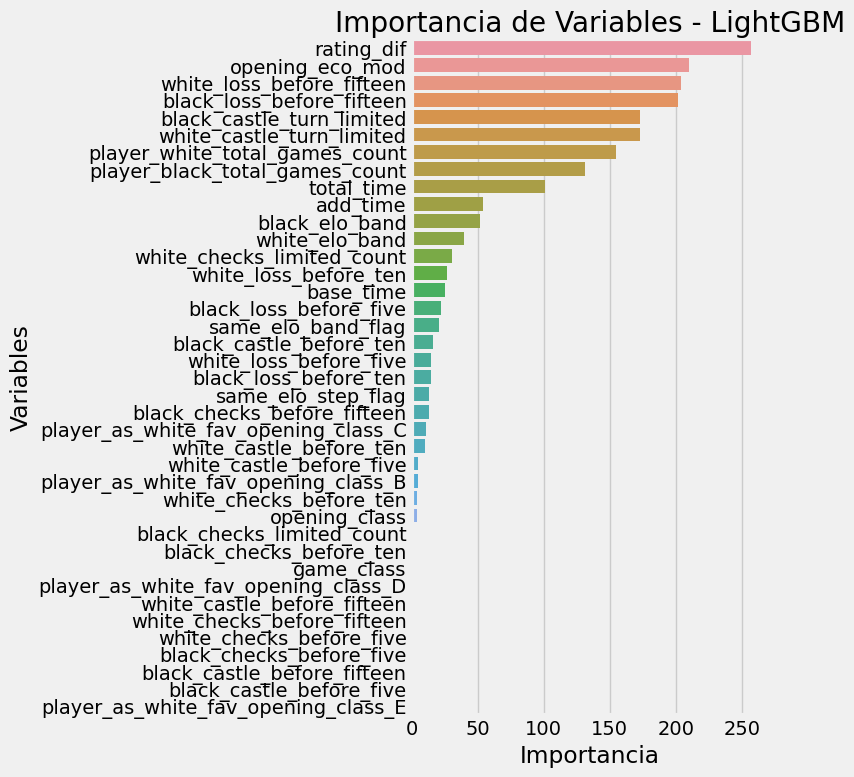

In [110]:
importances = lgbm_3.feature_importances_
columns = x_test.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title("Importancia de Variables - LightGBM")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()